In [2]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
import amici
import numpy as np

sbml_file_dir="models/manual_implementations/sbml_export"
output_dir="results/PyPESTO_comparison/"
model_name="glycolysis_feastfamine_pulse1"

# model_module = amici.import_model_module(model_name, output_dir)
# model = model_module.getModel()
#
# type(model)


/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


Loading the profiling result failed. It is highly likely that no profiling result exists within results/PyPESTO_optimized_params/PyPESTO_results_optimization.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within results/PyPESTO_optimized_params/PyPESTO_results_optimization.hdf5.


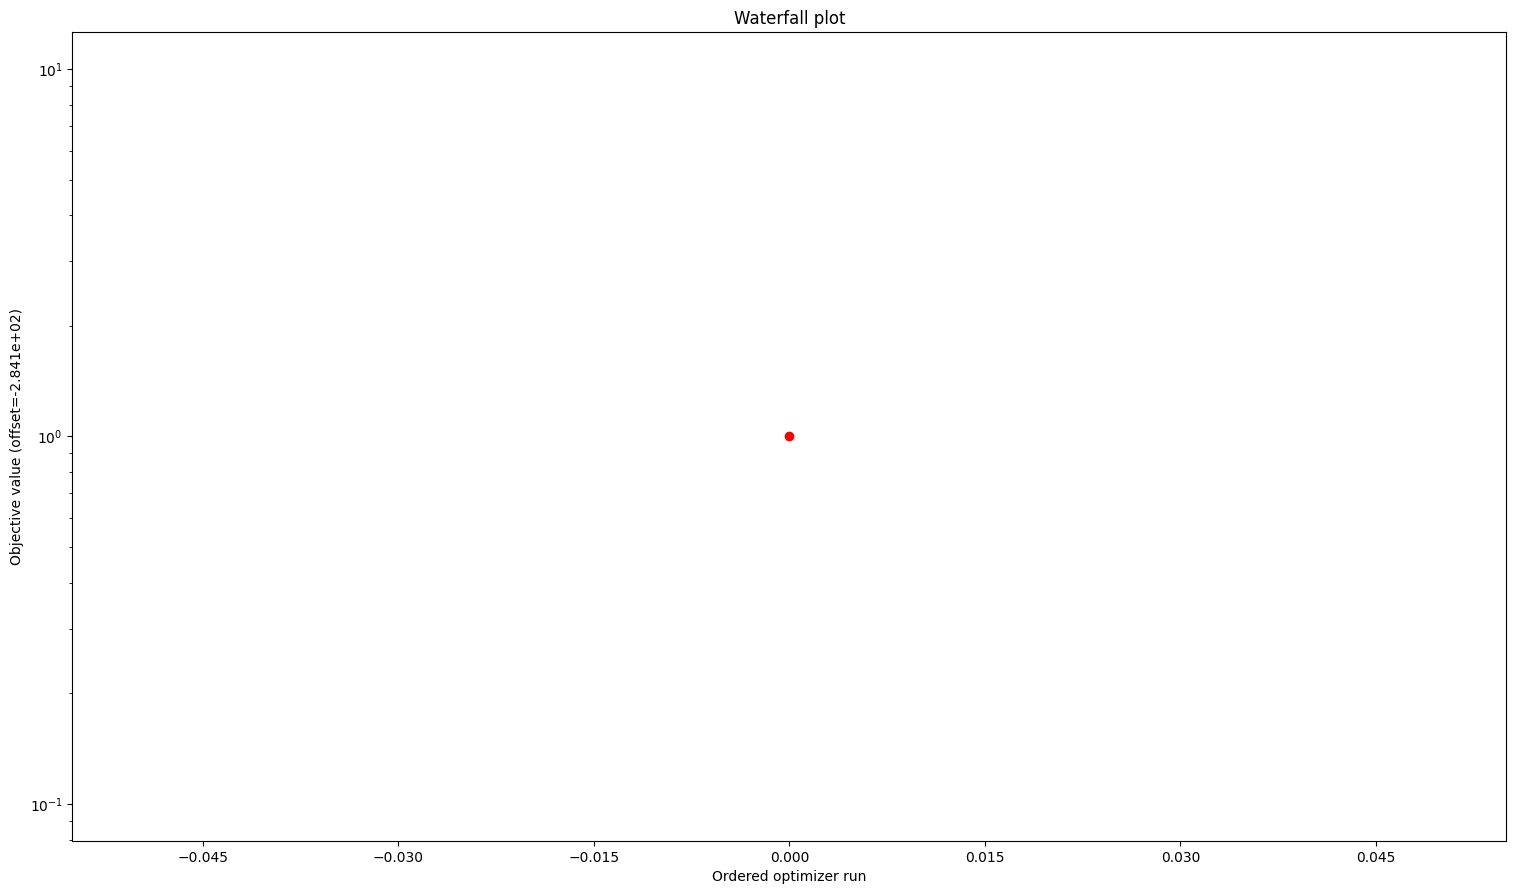

In [8]:
import pypesto.store as store
import pypesto.visualize as visualize
# result=h5py.File("results/PyPESTO_optimized_params/PyPESTO_results_optimization.hdf5")
result_loaded=store.read_result("results/PyPESTO_optimized_params/PyPESTO_results_optimization.hdf5")

visualize.waterfall(result_loaded);

In [6]:
## we will first time benchmark simulation times. We note that comparing between different solvers is tricky.
from jaxkineticmodel.load_sbml.sbml_model import SBMLModel

jaxkineticmodel_sbml=SBMLModel(f"{sbml_file_dir}/{model_name}.xml")

parameter_values=[]
#get the parameters from the list of amici parameters and map values
for i in model.getParameterIds():
    parameter_values.append(jaxkineticmodel_sbml.parameters[i])

print(parameter_values)


09:32:41,289 - jaxkineticmodel.load_sbml.sbml_model - INFO - No internal inconsistencies found
09:32:41,291 - jaxkineticmodel.load_sbml.sbml_model - INFO - Model loaded.
09:32:41,292 - jaxkineticmodel.load_sbml.sbml_model - INFO -  number of species: 30
09:32:41,293 - jaxkineticmodel.load_sbml.sbml_model - INFO -  number of reactions: 42
09:32:41,294 - jaxkineticmodel.load_sbml.sbml_model - INFO -  number of global parameters: 143
09:32:41,295 - jaxkineticmodel.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 1
09:32:41,296 - jaxkineticmodel.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
09:32:41,297 - jaxkineticmodel.load_sbml.sbml_model - INFO -  number of assignment rules: 1
09:32:41,298 - jaxkineticmodel.load_sbml.sbml_model - INFO -  number of event rules: 0
[0.95, 3800.0, 0.15, 0.08, 0.23, 30.0, 0.2, 0.734, 1.1918, 1.0078, 0.2, 2.88, 13.4667, 0.2586, 1.0257, 0.307, 0.0778536, 0.01, 0.024574614, 0.0001, 100.0, 0.166666666666667, 0.02

In [7]:
# print("Model parameters:", list(model.getParameterIds()))
# print("Model outputs:   ", list(model.getObservableIds()))
# print("Model states:    ", list(model.getStateIds()))

timepoints = np.array(
    [0.0,2.5,5.0,10.0,15.0,20.0,30.0,40.0,50.0,60.0,80.0,100.0,120.0,160.0,200.0,240.0,])

print("Initial conditions:", model.getInitialStates())
print("Parameters:", model.getParameters())
print("Parameters:", model.getFixedParameters())
model.setTimepoints(timepoints)
# # 'ECbiomass', 'D'
model.setFixedParameters(np.array([3.7683659, 0.1]))
model.setParameters(parameter_values)
solver = model.getSolver()

rdata = amici.runAmiciSimulation(model, solver)

help(model.setT0)

2025-02-28 09:32:42.173 - amici.swig_wrappers - WARNING - [AMICI:NaN] AMICI encountered a NaN value for xdot[1] (ICglucose) at t=0.000000 


Initial conditions: (3.730584, 0.196003, 1.376832, 0.716385, 63.31204, 0.202293, 0.064568, 0.093705, 10.0, 0.057001, 0.006213, 0.048571, 0.0106, 0.020586, 1.5794, 0.0001, 2.311074, 0.1, 0.0, 0.297534, 1.171415, 0.152195, 10.0, 0.04, 0.0, 0.431427, 0.1, 0.1, 1.5)
Parameters: (0.95, 3800.0, 0.15, 0.08, 0.23, 30.0, 0.2, 0.734, 1.1918, 1.0078, 0.2, 2.88, 13.4667, 0.2586, 1.0257, 0.307, 0.0778536, 0.01, 0.024574614, 0.0001, 100.0, 0.166666666666667, 0.023, 0.05, 1.4, 3.8, 0.886, 1.0, 0.105885, 0.5, 0.7023, 0.71, 0.1, 0.71, 5.12, 3.0, 100.0, 0.0845, 0.0174, 0.397, 0.66, 0.65, 0.095, 0.001, 0.0012, 0.111, 3.15, 0.069, 0.451, 2.0, 2.4, 78.396, 0.0391, 6.45, 5.25, 0.012626, 1.169, 10000.0, 0.54, 0.023, 1.2, 0.93, 4.8, 0.73, 2.0, 30.98, 0.0056, 0.459, 2.92, 1.5, 0.908, 0.022, 44.5, 3200.0, 0.003, 0.2, 0.53, 0.3, 0.007881, 0.001, 0.5, 5.99, 1.0, 0.1, 0.1, 14.2667, 0.19, 1.2, 0.08, 5.95, 4.011, 0.043, 0.5, 0.007607, 0.001, 9.3167, 4.0, 0.281, 0.243, 9.3, 0.2, 60000.0, 0.1613283, 0.001, 13.5, 6.9e-

2025-02-28 09:32:42.176 - amici.swig_wrappers - WARNING - [AMICI:NaN] AMICI encountered a NaN value for w[0] (ECglucose) at t=0.000000 


09:32:42,176 - amici.swig_wrappers - WARNING - [AMICI:NaN] AMICI encountered a NaN value for w[0] (ECglucose) at t=0.000000 


2025-02-28 09:32:42.178 - amici.swig_wrappers - DEBUG - [cvodes:CVode:FIRST_RHSFUNC_ERR] The right-hand side routine failed at the first call.


09:32:42,178 - amici.swig_wrappers - DEBUG - [cvodes:CVode:FIRST_RHSFUNC_ERR] The right-hand side routine failed at the first call.


2025-02-28 09:32:42.180 - amici.swig_wrappers - ERROR - [FORWARD_FAILURE] AMICI forward simulation failed at t = 0: AMICI failed to integrate the forward problem


09:32:42,180 - amici.swig_wrappers - ERROR - [FORWARD_FAILURE] AMICI forward simulation failed at t = 0: AMICI failed to integrate the forward problem
Help on method setT0 in module amici.amici:

setT0(t0: "'float'") method of amici.amici.ModelPtr instance
    Set simulation start time.

    Output timepoints are absolute timepoints, independent of
    :math:`t_{0}`.
    For output timepoints :math:`t <  t_{0}`, the initial state will be
    returned.

    :param t0: Simulation start time



In [20]:
import amici
import time

sbml_file_dir = "models/manual_implementations/sbml_export"
output_dir = "results/PyPESTO_comparison/"
model_name="glycolysis_feastfamine_pulse1"

sbml_file = f"{sbml_file_dir}/{model_name}.xml"
# Create an SbmlImporter instance for our SBML model
sbml_importer = amici.SbmlImporter(sbml_file)

constant_parameters = ['ECbiomass', 'D']

## Aha: we have an assignment rule and not a rate rule

# Retrieve model output names and formulae from AssignmentRules and remove the respective rules
observables = amici.assignmentRules2observables(
    sbml_importer.sbml,  # the libsbml model object
    filter_function=lambda variable: variable.getName() == "ECglucose")
print("Observables:", observables)


# filter_function=lambda variable: variable.getId().startswith("observable_")
#                                  and not variable.getId().endswith("_sigma"),



Observables: {}


In [51]:
sbml_importer.sbml

for rule in sbml_importer.sbml.getListOfRules():
    print(rule.getTypeCode())

22
